In [23]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt



# 1) Preprocessing Data

#### Load Data

In [2]:
breast_cancer_data = pd.read_csv('data.txt', header=None, names=['id','target','mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error','concavity error',
 'concave points error', 'symmetry error' ,'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness' ,'worst concavity',
 'worst concave points' ,'worst symmetry', 'worst fractal dimension'])

In [3]:
breast_cancer_data.head()

,id,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Check for null values & drop ID column

In [4]:
print(breast_cancer_data.isnull().values.any())

breast_cancer_data.drop('id',axis=1,inplace=True)

False


#### Convert M and B labels into binary 1 and 0, respectively

In [5]:
breast_cancer_data['target'] = breast_cancer_data['target'].map({'M':1,'B':0})

#### Standardize data

In [6]:
datas = pd.DataFrame(preprocessing.scale(breast_cancer_data.iloc[:,1:32]))
datas.columns = list(breast_cancer_data.iloc[:,1:32].columns)
datas['target'] = breast_cancer_data['target']

In [7]:
datas.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [8]:
X = datas.iloc[:,:-1]
y = np.ravel(datas.loc[:,["target"]])

NameError: name 'target' is not defined

#### Split the dataset in train and test at a ratio of 80% to 20% respectively:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2) Train Models and Evaluate Performance

### k-Nearest Neighbors

In [10]:
best_cv_score = 0
best_cv_k = 0
model = None 
for k in range(1,25):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores_cv = cross_val_score(knn_cv, X_train, y_train, scoring='accuracy',cv=10)
    mean_scores_cv = scores_cv.mean()*100
    
    print('Mean accuracy with 10-fold cross-validation is %s' % round(mean_scores_cv,2),' k=',k)

    if mean_scores_cv > best_cv_score:
        best_cv_score = mean_scores_cv
        best_cv_k = k
        model = knn_cv

('Mean accuracy with 10-fold cross-validation is 94.07', ' k=', 1)
('Mean accuracy with 10-fold cross-validation is 95.4', ' k=', 2)
('Mean accuracy with 10-fold cross-validation is 96.28', ' k=', 3)
('Mean accuracy with 10-fold cross-validation is 96.49', ' k=', 4)
('Mean accuracy with 10-fold cross-validation is 96.49', ' k=', 5)
('Mean accuracy with 10-fold cross-validation is 96.05', ' k=', 6)
('Mean accuracy with 10-fold cross-validation is 96.05', ' k=', 7)
('Mean accuracy with 10-fold cross-validation is 96.72', ' k=', 8)
('Mean accuracy with 10-fold cross-validation is 96.5', ' k=', 9)
('Mean accuracy with 10-fold cross-validation is 95.62', ' k=', 10)
('Mean accuracy with 10-fold cross-validation is 95.84', ' k=', 11)
('Mean accuracy with 10-fold cross-validation is 95.4', ' k=', 12)
('Mean accuracy with 10-fold cross-validation is 95.84', ' k=', 13)
('Mean accuracy with 10-fold cross-validation is 95.4', ' k=', 14)
('Mean accuracy with 10-fold cross-validation is 96.28', ' k=

In [12]:
knn_model_8 = KNeighborsClassifier(n_neighbors=8)

knn_model_8.fit(X_train,y_train)

knn_accuracy = knn_model_8.score(X_test,y_test)

print(knn_accuracy)

0.947368421053


### Support Vector Machine

In [16]:
svm_mod = SVC()
svm_mod.fit(X_train, y_train) 
svm_score = svm_mod.score(X_test, y_test)
print(svm_score)

0.973684210526


### Logistic Regression

In [25]:
lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 97.81


# 3) Feature Selection

In [18]:
malignant = datas.loc[datas['target'] == 1]
benign = datas.loc[datas['target'] == 0]

In [25]:
datas.corr().iloc[0,:]

mean radius                1.000000
mean texture               0.323782
mean perimeter             0.997855
mean area                  0.987357
mean smoothness            0.170581
mean compactness           0.506124
mean concavity             0.676764
mean concave points        0.822529
mean symmetry              0.147741
mean fractal dimension    -0.311631
radius error               0.679090
texture error             -0.097317
perimeter error            0.674172
area error                 0.735864
smoothness error          -0.222600
compactness error          0.206000
concavity error            0.194204
concave points error       0.376169
symmetry error            -0.104321
fractal dimension error   -0.042641
worst radius               0.969539
worst texture              0.297008
worst perimeter            0.965137
worst area                 0.941082
worst smoothness           0.119616
worst compactness          0.413463
worst concavity            0.526911
worst concave points       0

In [21]:
sns.set(color_codes=True)

1


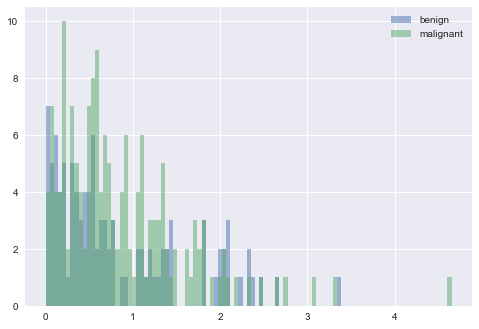

2


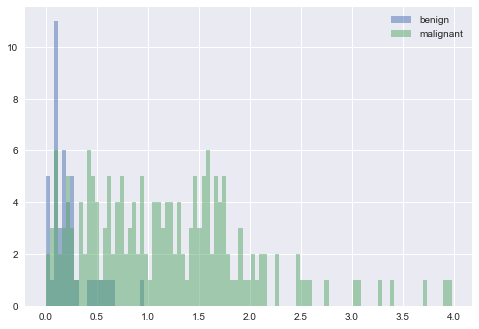

3


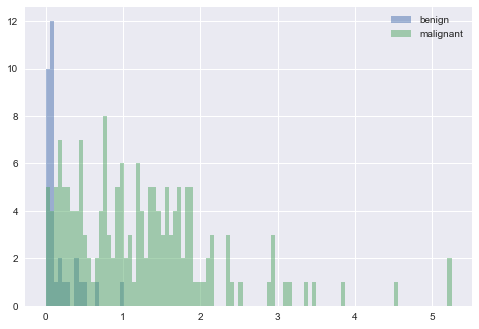

4


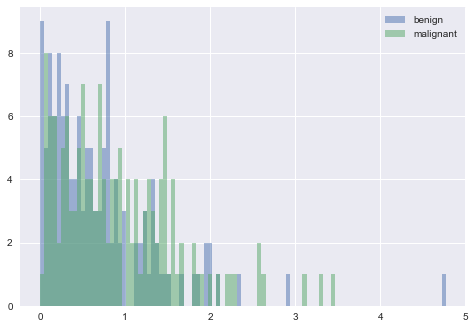

5


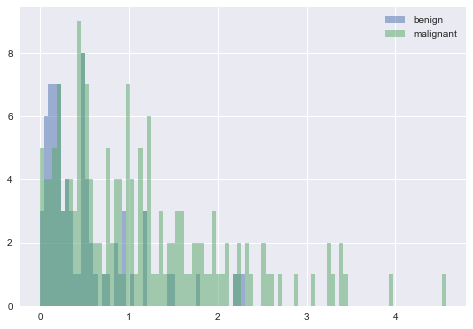

6


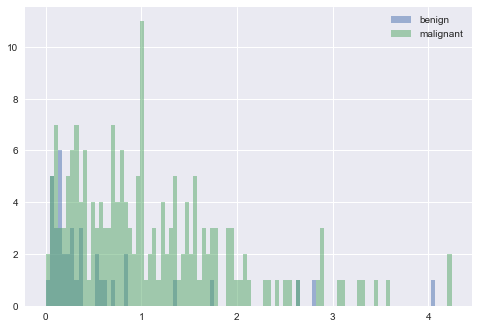

7


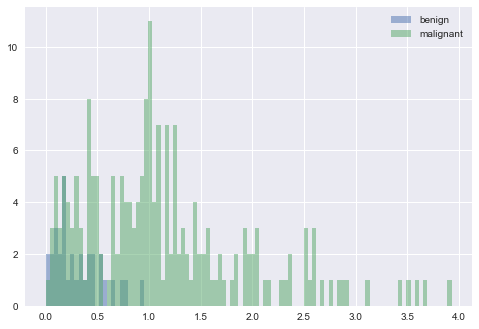

8


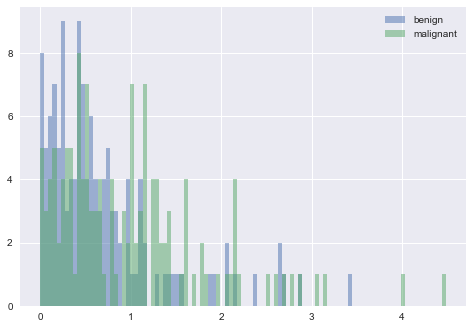

9


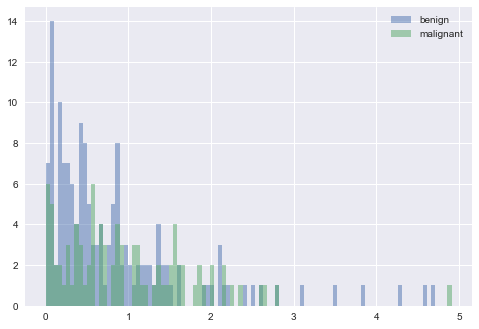

10


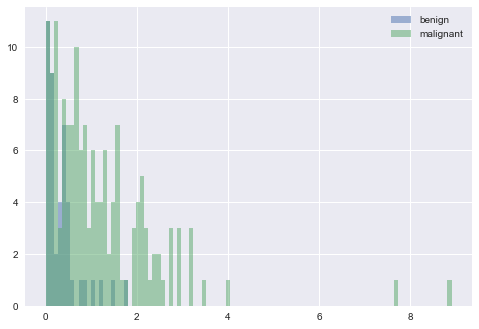

11


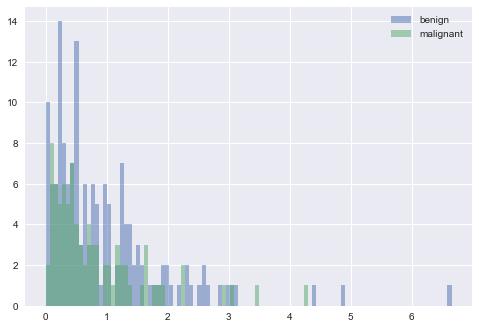

12


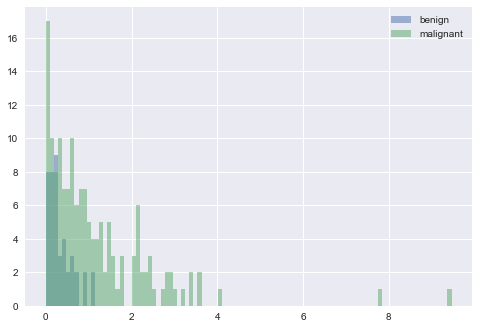

13


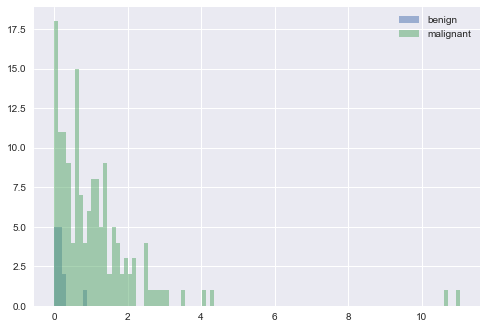

14


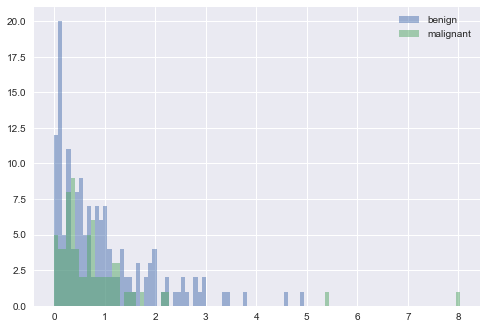

15


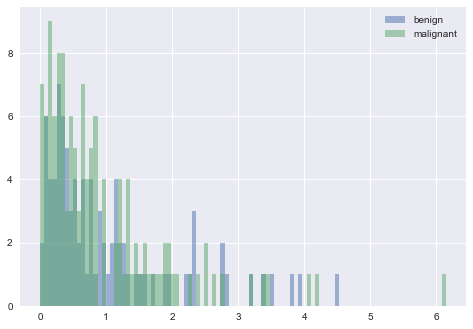

16


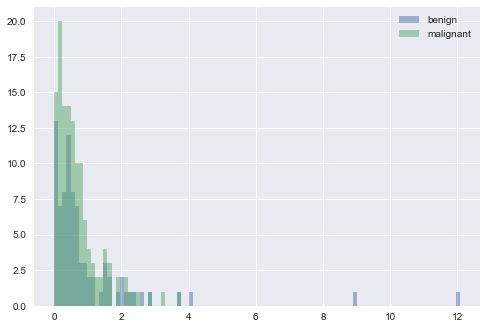

17


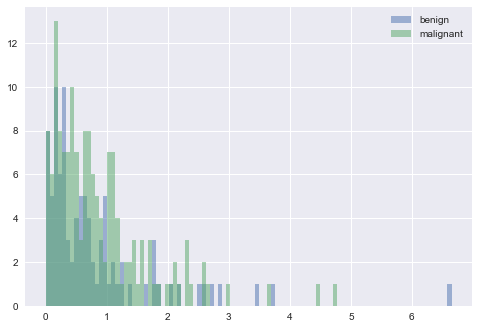

18


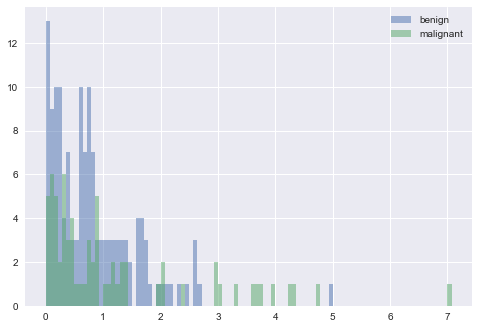

19


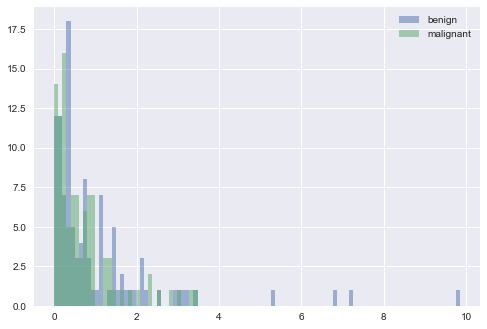

20


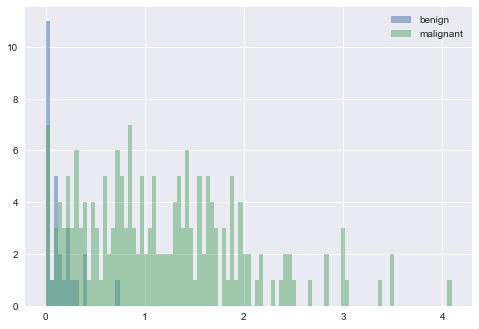

21


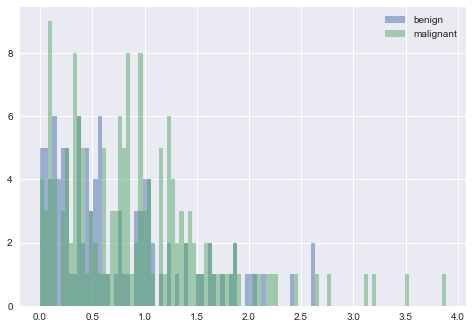

22


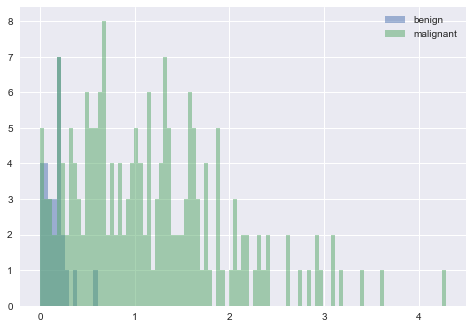

23


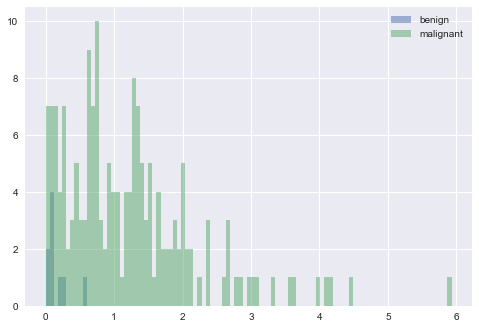

24


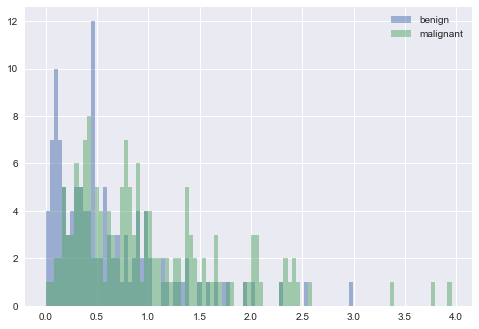

25


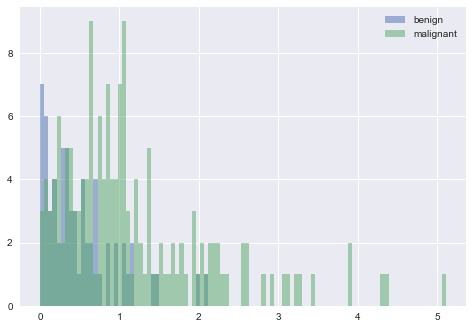

26


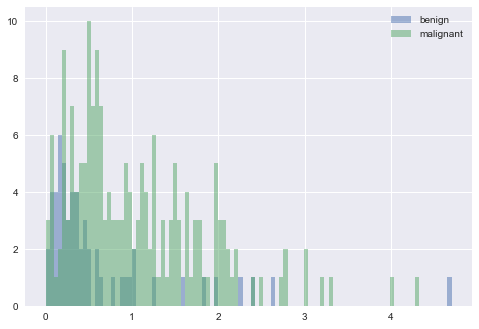

27


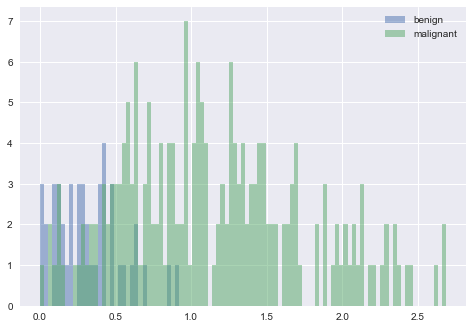

28


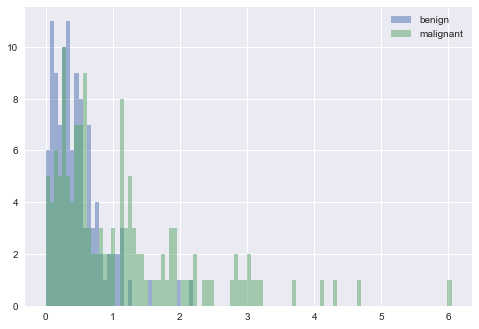

29


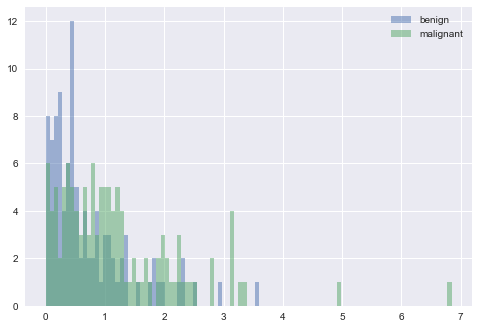

30


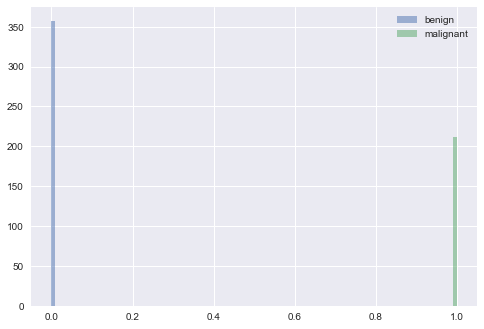

In [24]:
for x in range(1,31,1):
    print(x)
    test1 = benign.iloc[:,x]
    test2 = malignant.iloc[:,x]
    
    upper = max(max(test1),max(test2))
    
    bins = np.linspace(0, upper, 100)

    plt.hist(test1, bins, alpha=0.5, label='benign')
    plt.hist(test2, bins, alpha=0.5, label='malignant')
    plt.legend(loc='upper right')
    plt.show()

In [2]:
breast_cancer_data = pd.read_csv('data.txt', header=None)
breast_cancer_data = breast_cancer_data.drop(breast_cancer_data.columns[0], axis=1)

breast_cancer_data[1] = breast_cancer_data[1].replace(["B", "M"], [-1,+1])

In [3]:
train, test = train_test_split(breast_cancer_data, test_size=0.2)

train.shape

(455, 31)

In [4]:
y_train = train[1]
X_train = train.drop(train.columns[1], axis=1)

y_test = test[1]
X_test = test.drop(test.columns[1], axis=1)

print(y_train.shape)
print(X_train.shape)

(455,)
(455, 30)


In [5]:
X_test

,1,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
292,-1,16.02,83.14,513.7,0.10050,0.07943,0.061550,0.033700,0.1730,0.06470,...,13.740,19.93,88.81,585.4,0.14830,0.20680,0.22410,0.10560,0.3380,0.09584
350,-1,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,0.1671,0.05731,...,13.280,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
501,1,24.49,92.33,595.9,0.11620,0.16810,0.135700,0.067590,0.2275,0.07237,...,16.010,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830
91,1,22.76,100.20,728.2,0.09200,0.10360,0.112200,0.074830,0.1717,0.06097,...,16.430,25.84,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828
403,-1,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,0.06200,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834
319,-1,17.00,78.60,477.3,0.07557,0.03454,0.013420,0.016990,0.1472,0.05561,...,12.900,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
195,-1,16.33,82.53,516.4,0.07941,0.05366,0.038730,0.023770,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
85,1,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,0.2132,0.06022,...,22.930,27.68,152.20,1603.0,0.13980,0.20890,0.31570,0.16420,0.3695,0.08579
7,1,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
200,-1,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.041070,0.1979,0.06013,...,14.440,28.36,92.15,638.4,0.14290,0.20420,0.13770,0.10800,0.2668,0.08174


In [8]:
y_test

292   -1
350   -1
501    1
91     1
403   -1
319   -1
195   -1
85     1
7      1
200   -1
57     1
59    -1
251   -1
44     1
568   -1
330    1
331   -1
73     1
351    1
426   -1
415   -1
196    1
430    1
5      1
32     1
213    1
64     1
423   -1
250    1
264    1
      ..
259    1
191   -1
175   -1
185   -1
477   -1
375   -1
521    1
478   -1
111   -1
68    -1
365    1
324   -1
247   -1
325   -1
96    -1
531   -1
40     1
338   -1
222   -1
400    1
300    1
371   -1
147   -1
143   -1
348   -1
402   -1
543   -1
8      1
506   -1
31     1
Name: 1, dtype: int64

In [6]:
def svm():
    model = SVC()
    model.fit(X_train, y_train) 
    score = model.score(X_test, y_test)
    print(score)

In [7]:
svm()

0.59649122807
